# ArbPredict: Model Developement

During this notebook we will:
* Present the distributions
* Confirm outliers are removed
* Begin hypothese testing on features.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
sys.path.append('../')
import HelperFunctions as helper
sns.set(style="whitegrid")

plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 80)

%matplotlib inline

In [2]:
df = pd.read_csv('rookie.csv')
df['log_sal'] = np.log(df.salary)

First we must seperate out the pitchers.

In [3]:
pitch = df[df['prim_pos'].eq('P')]
bat = df[df['prim_pos'].ne('P')]

In [4]:
bat.head()

,Unnamed: 0,playerID,nameFirst,nameLast,weight,height,debut,finalGame,awardWinner,voteWinner,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,throws,bats,prim_pos,log_sal
2,2,abreuto01,Tony,Abreu,200.0,70.0,2007-05-22,2014-07-28,0,0,48.666667,122.333333,11.666667,30.666667,8.333333,0.666667,1.000000,10.333333,0.666667,0.666667,4.666667,23.333333,0.333333,1.000000,0.000000,2.000000,4.333333,0.335772,0.251415,53.333333,0.379815,0.715586,745000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,R,B,3B,13.521139
4,4,ackledu01,Dustin,Ackley,205.0,73.0,2011-06-17,2016-05-29,0,1,118.666667,441.333333,54.333333,108.333333,18.666667,3.666667,7.333333,39.000000,7.000000,2.000000,45.333333,91.666667,3.000000,0.333333,1.666667,1.666667,4.000000,0.320469,0.250526,186.000000,0.431767,0.752236,2600000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0,0,0,0,0,R,L,2B,14.771022
5,5,adamsma01,Matt,Adams,245.0,75.0,2012-05-20,2021-07-24,0,0,92.333333,303.000000,36.333333,85.666667,18.000000,1.666667,11.333333,44.000000,1.000000,1.000000,18.000000,72.666667,1.666667,1.000000,0.000000,2.333333,7.000000,0.314210,0.272132,172.000000,0.548208,0.862418,1650000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,R,L,1B,14.316286
12,12,alonsyo01,Yonder,Alonso,230.0,73.0,2010-09-01,2019-09-29,0,1,74.666667,222.000000,19.333333,61.666667,15.000000,0.000000,4.666667,26.666667,1.000000,0.000000,24.000000,44.000000,3.000000,1.000000,0.333333,1.333333,5.666667,0.317584,0.269889,110.333333,0.491143,0.808727,1650000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,R,L,1B,14.316286
13,13,altuvjo01,Jose,Altuve,166.0,66.0,2011-07-20,2021-10-03,1,1,118.666667,474.333333,56.666667,135.000000,25.000000,2.333333,4.666667,33.666667,25.000000,9.000000,25.666667,62.666667,1.666667,3.333333,4.333333,4.333333,12.333333,0.317689,0.282899,210.666667,0.439014,0.756703,2500000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,R,R,2B,14.731801


In [5]:
pitch = pitch[['playerID','awardWinner','voteWinner','salary','seasons','G_p','W_p','L_p','GS_p','CG','SHO_p','SV_p','IPouts',
               'ER_p','HR_p','SO_p','IBB_p','BAOpp','ERA','WP','HBP_p','BK','BFP','GF','R_p','SH_p','SF_p','GIDP_p',
               'WHIP','IP','BB_p','throws_R','log_sal']]
bat = bat[['playerID','awardWinner','voteWinner','salary','seasons','G','AB','R','H','DBL','TPL','HR','RBI','SB','CS','BB','SO',
           'IBB','HBP','SH','SF','GIDP','OBP','BA','TB','SLG','OPS','throws_R','bats_L','bats_R','prim_pos_2B',
           'prim_pos_3B','prim_pos_C','prim_pos_OF','prim_pos_SS','log_sal']]
print(pitch.shape)
print(bat.shape)

(495, 33)
(499, 36)


### Batters

This will model will contain only players whose primary position is not Pitcher.

In [6]:
bat.columns.values

array(['playerID', 'awardWinner', 'voteWinner', 'salary', 'seasons', 'G',
       'AB', 'R', 'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS',
       'throws_R', 'bats_L', 'bats_R', 'prim_pos_2B', 'prim_pos_3B',
       'prim_pos_C', 'prim_pos_OF', 'prim_pos_SS', 'log_sal'],
      dtype=object)

In [7]:
features = ['awardWinner','voteWinner','seasons','G','AB','R','H','DBL','TPL','HR','RBI','SB','CS','BB','SO','IBB','HBP',
            'SH','SF','GIDP','OBP','BA','TB','SLG','OPS','throws_R','bats_L','bats_R','prim_pos_2B','prim_pos_3B','prim_pos_C',
            'prim_pos_OF','prim_pos_SS']

bat_con_cols = ['G','AB','R','H','DBL','TPL','HR','RBI','SB','CS','BB','IBB','HBP','SH','SF','GIDP','OBP','BA','TB','SLG','OPS']

bat_cat_cols = ['awardWinner','voteWinner','seasons','throws_R','bats_L','bats_R','prim_pos_2B','prim_pos_3B','prim_pos_C','prim_pos_OF','prim_pos_SS']

### Construct a Dummy Regressor

This model is simply a beanchmark. Expected value is 0.

In [8]:
y = bat['log_sal']
X = bat[features]

bat_features = bat[features]
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X,y)
kelevin = dummy_regr.predict(X)
r2_score(y, kelevin)

0.0

In [11]:
target = bat.log_sal

X_train, X_test, y_train, y_test = train_test_split(bat[features], target, random_state = 115, test_size = 0.2)

X_train_bat = helper.df_scaler(X_train,bat_con_cols)
X_test_bat = helper.df_scaler(X_test,bat_con_cols)
y_train_bat = helper.scaler(y_train)
y_test_bat = helper.scaler(y_test)

X_train_bat = X_train_bat.replace(np.nan,0)
X_test_bat = X_test_bat.replace(np.nan,0)
y_train_bat = y_train_bat.replace(np.nan,0)
y_test_bat = y_test_bat.replace(np.nan,0)

#check the shape of results
print('Training set - Features: ', X_train.shape, 'Target: ', y_train.shape)
print('Testing set - Features: ', X_test.shape, 'Target: ',y_test.shape)

Training set - Features:  (399, 33) Target:  (399,)
Testing set - Features:  (100, 33) Target:  (100,)


In [41]:
X_train.head()

,awardWinner,voteWinner,seasons,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_SS
792,0,1,10.0,86.333333,254.333333,31.333333,61.666667,14.666667,1.000000,4.333333,31.666667,2.333333,1.000000,30.333333,31.666667,6.000000,3.333333,3.666667,1.666667,11.333333,0.325065,0.246326,111.333333,0.452716,0.777781,1,0,1,0,0,1,0,0
535,1,1,9.0,28.333333,97.666667,10.000000,23.333333,5.333333,0.333333,3.333333,13.000000,1.333333,0.333333,7.000000,28.666667,0.333333,0.666667,0.333333,0.000000,1.666667,0.381818,0.291040,48.333333,0.572819,0.954637,0,0,1,0,0,0,1,0
523,0,1,8.0,101.666667,347.000000,42.333333,105.000000,19.666667,5.000000,10.666667,58.333333,2.666667,1.666667,27.000000,47.666667,4.000000,1.666667,0.333333,3.000000,13.000000,0.354046,0.301595,202.000000,0.625200,0.979246,0,1,0,0,0,0,0,0
908,1,1,4.0,112.000000,423.666667,86.000000,133.000000,24.000000,5.666667,20.666667,65.333333,28.666667,4.000000,62.000000,101.666667,4.666667,5.666667,0.000000,5.333333,5.666667,0.370702,0.289225,280.666667,0.614557,0.985259,1,0,1,0,0,0,1,0
51,0,1,8.0,60.333333,189.666667,26.333333,52.666667,9.333333,1.000000,1.666667,16.333333,5.333333,1.666667,14.666667,28.000000,0.333333,5.000000,1.333333,2.000000,4.666667,0.278808,0.211238,81.000000,0.313371,0.592179,1,0,1,0,0,0,0,1


In [42]:
X_train_bat.head()

,awardWinner,voteWinner,seasons,SO,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_SS,G_sc,AB_sc,R_sc,H_sc,DBL_sc,TPL_sc,HR_sc,RBI_sc,SB_sc,CS_sc,BB_sc,IBB_sc,HBP_sc,SH_sc,SF_sc,GIDP_sc,OBP_sc,BA_sc,TB_sc,SLG_sc,OPS_sc
792,0,1,10.0,31.666667,1,0,1,0,0,1,0,0,0.286485,0.039851,-0.114422,-0.111528,0.152536,-0.466466,-0.423559,0.042481,-0.397061,-0.474992,0.529121,2.358284,0.249127,0.956606,-0.135353,1.511304,0.045950,-0.245390,-0.186654,-0.254686,-0.167743
535,1,1,9.0,28.666667,0,0,1,0,0,0,1,0,-1.370837,-1.056262,-1.081612,-1.047424,-0.905932,-0.857063,-0.575674,-0.820418,-0.565481,-0.802036,-0.954203,-0.643450,-0.711275,-0.667589,-1.319688,-0.954822,0.996385,0.613937,-0.950024,0.683003,0.825197
523,0,1,8.0,47.666667,0,1,0,0,0,0,0,0,0.724628,0.688191,0.384285,0.946440,0.719573,1.877121,0.539838,1.275193,-0.340921,-0.147948,0.317218,1.298848,-0.351124,-0.667589,0.812116,1.936498,0.531284,0.816784,0.911952,1.091967,0.963362
908,1,1,4.0,101.666667,1,0,1,0,0,0,1,0,1.019898,1.224586,2.364003,1.630051,1.211005,2.267719,2.060991,1.598780,4.038003,0.996705,2.542204,1.651993,1.089479,-0.830008,2.470185,0.065644,0.810228,0.579051,1.865155,1.008869,0.997122
51,0,1,8.0,28.000000,1,0,1,0,0,0,0,1,-0.456452,-0.412587,-0.341107,-0.331260,-0.452303,-0.466466,-0.829200,-0.666329,0.108200,-0.147948,-0.466825,-0.643450,0.849378,-0.180330,0.101514,-0.189472,-0.728716,-0.919720,-0.554203,-1.342607,-1.209791


In [62]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

train_R2 = r2_score(y_train, y_pred_train)
test_R2 = r2_score(y_test, y_pred_test)

In [63]:
print('Train R2:',train_R2)
print('Test R2:', test_R2)
print('\n')
print(model_coef)

Train R2: 0.4472030134233038
Test R2: 0.33155801435777044


       Features    Values
21           BA  0.541555
1    voteWinner  0.292438
0   awardWinner  0.261551
20          OBP  0.155429
27       bats_R  0.126614
26       bats_L  0.039616
8           TPL  0.030835
25     throws_R  0.018436
12           CS  0.018384
13           BB  0.009283
10          RBI  0.008019
22           TB  0.007891
15          IBB  0.004354
11           SB  0.002422
6             H  0.002030
4            AB  0.001402
14           SO -0.001096
16          HBP -0.002051
2       seasons -0.002340
3             G -0.005228
9            HR -0.006591
18           SF -0.010178
5             R -0.015547
19         GIDP -0.025568
17           SH -0.028111
7           DBL -0.030140
28  prim_pos_2B -0.069863
30   prim_pos_C -0.073183
32  prim_pos_SS -0.082383
31  prim_pos_OF -0.083076
29  prim_pos_3B -0.134344
24          OPS -0.137119
23          SLG -0.292548


In [64]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_bat, y_train_bat)

y_train_pred_lasso = lasso.predict(X_train_bat)
y_test_pred_lasso = lasso.predict(X_test_bat)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train_bat.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

train_R2 = r2_score(y_train_bat, y_train_pred_lasso)
test_R2 = r2_score(y_test_bat, y_test_pred_lasso)

In [65]:
print('Training R2: ', train_R2)
print(' Testing R2:', test_R2)
print('\n')
print(model_coef)

Training R2:  0.4296117513688624
 Testing R2: 0.40925461207876024


       Features    Values
21        CS_sc  0.541555
1    voteWinner  0.292438
0   awardWinner  0.261551
20        SB_sc  0.155429
27      GIDP_sc  0.126614
26        SF_sc  0.039616
8   prim_pos_3B  0.030835
25        SH_sc  0.018436
12         G_sc  0.018384
13        AB_sc  0.009283
10  prim_pos_OF  0.008019
22        BB_sc  0.007891
15         H_sc  0.004354
11  prim_pos_SS  0.002422
6        bats_R  0.002030
4      throws_R  0.001402
14         R_sc -0.001096
16       DBL_sc -0.002051
2       seasons -0.002340
3            SO -0.005228
9    prim_pos_C -0.006591
18        HR_sc -0.010178
5        bats_L -0.015547
19       RBI_sc -0.025568
17       TPL_sc -0.028111
7   prim_pos_2B -0.030140
28       OBP_sc -0.069863
30        TB_sc -0.073183
32       OPS_sc -0.082383
31       SLG_sc -0.083076
29        BA_sc -0.134344
24       HBP_sc -0.137119
23       IBB_sc -0.292548


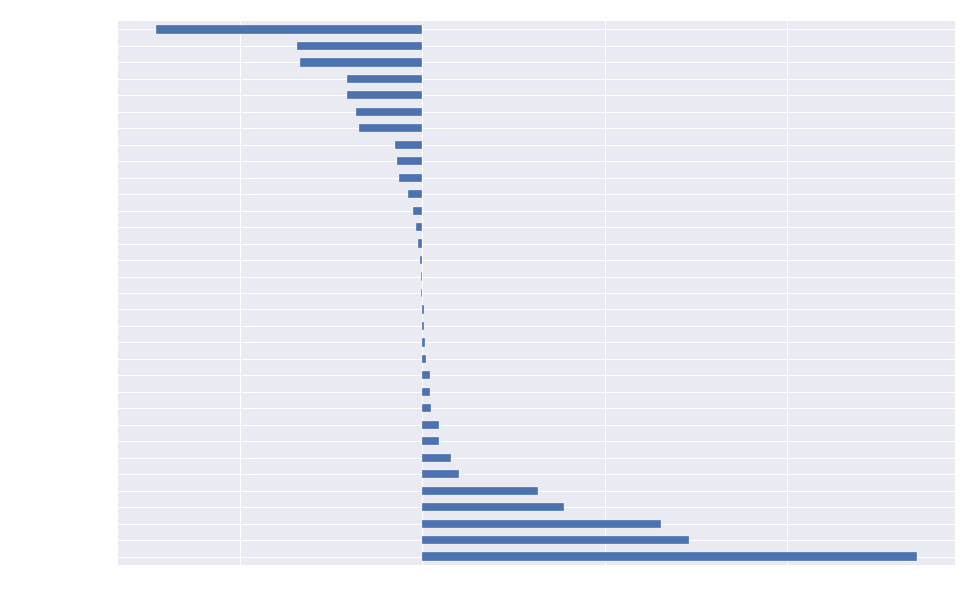

In [66]:
fig, ax = plt.subplots(figsize=(15,10))
model_coef.loc[model_coef['Values'] !=0].plot.barh(x = 'Features', y = 'Values', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_title('Lasso Batter Coefficients')

ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/lasso_batter_coef.png', dpi=300,
            bbox_inches='tight', padding_inches=4, transparent=True)

In [67]:
from sklearn import ensemble

In [70]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=3,max_features='sqrt',
                                        min_samples_leaf=15,min_samples_split=10,loss='huber')

In [72]:
GBest.fit(X_train_bat, y_train_bat)
y_train_pred_gb =  GBest.predict(X_train_bat)
y_pred_gb = GBest.predict(X_test_bat)


train_r2 = r2_score(y_train_bat, y_train_pred_gb)
test_r2 = r2_score(y_test_bat, y_pred_gb)
print('Train R^2: ' + str(train_r2))
print('Test R^2: ' + str(test_r2))

Train R^2: 0.9681890312865786
Test R^2: 0.2579265702500968


In [73]:
lassoCV_model = LassoCV(cv=5, random_state=42, n_jobs = -1)
lassoCV_model.fit(X_train_bat, y_train_bat)
trainr2 = lassoCV_model.score(X_train_bat, y_train_bat)
testr2 = lassoCV_model.score(X_test_bat, y_test_bat)

lassoCV_pred = lassoCV_model.predict(X_test_bat)
print('R2 of Train LassoCV: ', trainr2)
print('R2 of Test LassoCV: ', testr2)

R2 of Train LassoCV:  0.4242763720458326
R2 of Test LassoCV:  0.407031635670704


In [74]:
coef_df = pd.DataFrame()
coef_df['Features'] = X_train_bat.columns
coef_df['Values'] = lassoCV_model.coef_
model_coef = coef_df.sort_values(by='Values', ascending= False)
model_coef

,Features,Values
1,voteWinner,0.371578
0,awardWinner,0.268692
18,HR_sc,0.097549
19,RBI_sc,0.093062
17,TPL_sc,0.077332
15,H_sc,0.072842
23,IBB_sc,0.052935
21,CS_sc,0.042918
22,BB_sc,0.006838
3,SO,0.002728


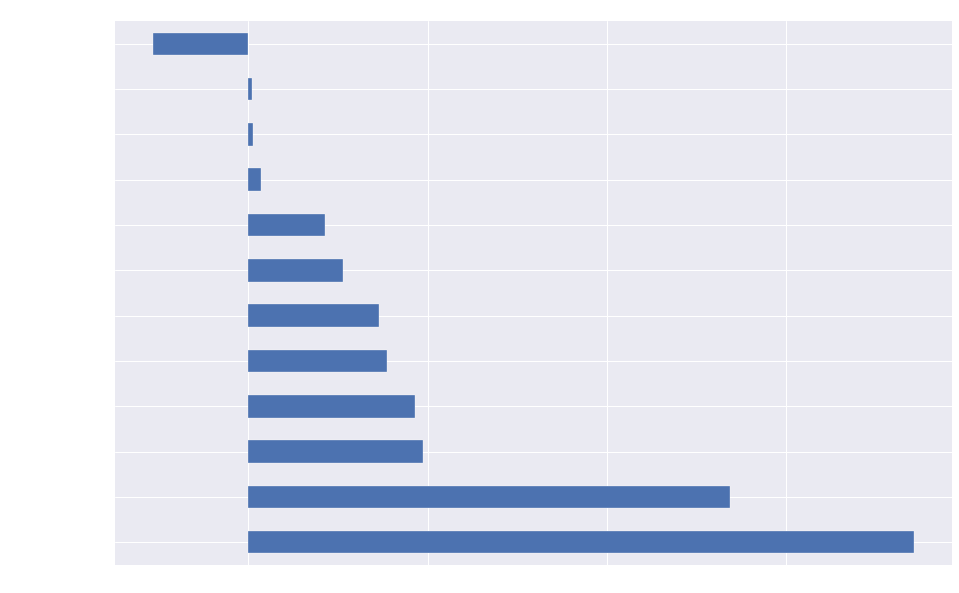

In [76]:
fig, ax = plt.subplots(figsize=(15,10))
model_coef.loc[model_coef['Values'] !=0].plot.barh(x='Features', y= 'Values', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_title('Lasso CV Batter Coefficients')

ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/lassocv_batter_coef.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )


### Pitchers

In [6]:
pitch.columns.values

array(['playerID', 'awardWinner', 'voteWinner', 'salary', 'seasons',
       'G_p', 'W_p', 'L_p', 'GS_p', 'CG', 'SHO_p', 'SV_p', 'IPouts',
       'ER_p', 'HR_p', 'SO_p', 'IBB_p', 'BAOpp', 'ERA', 'WP', 'HBP_p',
       'BK', 'BFP', 'GF', 'R_p', 'SH_p', 'SF_p', 'GIDP_p', 'WHIP', 'IP',
       'BB_p', 'throws_R', 'log_sal'], dtype=object)

In [7]:
features = ['awardWinner','voteWinner','seasons','G_p','W_p','L_p','GS_p','CG','SHO_p','SV_p','IPouts','ER_p','HR_p','SO_p','IBB_p','BAOpp','ERA',
            'WP','HBP_p','BK','BFP','GF','R_p','SH_p','SF_p','GIDP_p','WHIP','IP','BB_p','throws_R']

pitch_con_cols = ['G_p','W_p','L_p','GS_p','CG','SHO_p','SV_p','IPouts','ER_p','HR_p','SO_p','IBB_p','BAOpp','ERA','WP','HBP_p','BK','BFP','GF','R_p','SH_p','SF_p','GIDP_p','WHIP','IP','BB_p']

pitch_cat_cols = ['awardWinner','voteWinner','seasons','throws_R']

In [8]:
y = pitch['log_sal']
X = pitch[features]

bat_features = pitch[features]
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X,y)
kelevin = dummy_regr.predict(X)
r2_score(y, kelevin)

0.0

In [9]:
target = pitch.log_sal

X_train, X_test, y_train, y_test = train_test_split(pitch[features], target, random_state = 115, test_size = 0.2)

X_train = X_train.replace(np.inf,999)
X_test = X_test.replace(np.inf,999)
y_train = y_train.replace(np.inf,999)
y_test = y_test.replace(np.inf,999)

X_train_pitch = helper.df_scaler(X_train,pitch_con_cols)
X_test_pitch = helper.df_scaler(X_test,pitch_con_cols)
y_train_pitch = helper.scaler(y_train)
y_test_pitch = helper.scaler(y_test)

X_train_pitch = X_train_pitch.replace(np.nan,0)
X_test_pitch = X_test_pitch.replace(np.nan,0)
y_train_pitch = y_train_pitch.replace(np.nan,0)
y_test_pitch = y_test_pitch.replace(np.nan,0)



#check the shape of results
print('Training set - Features: ', X_train.shape, 'Target: ', y_train.shape)
print('Testing set - Features: ', X_test.shape, 'Target: ',y_test.shape)

Training set - Features:  (396, 30) Target:  (396,)
Testing set - Features:  (99, 30) Target:  (99,)


In [10]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

train_R2 = r2_score(y_train, y_pred_train)
test_R2 = r2_score(y_test, y_pred_test)

In [11]:
print('Train R2:',train_R2)
print('Test R2:', test_R2)

Train R2: 0.43419983386091965
Test R2: 0.33809864627014397


In [12]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_pitch, y_train_pitch)

y_train_pred_lasso = lasso.predict(X_train_pitch)
y_test_pred_lasso = lasso.predict(X_test_pitch)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train_pitch.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

train_R2 = r2_score(y_train_pitch, y_train_pred_lasso)
test_R2 = r2_score(y_test_pitch, y_test_pred_lasso)

In [13]:
print('Train R2:',train_R2)
print('Test R2:', test_R2)

Train R2: 0.42146655629503293
Test R2: 0.3507216799393643


In [14]:
print(model_coef)

       Features    Values
1    voteWinner  0.364539
7       GS_p_sc  0.185435
6        L_p_sc  0.055969
29      BB_p_sc  0.038040
9      SHO_p_sc  0.034541
25      SF_p_sc  0.026949
4        G_p_sc  0.021421
17       ERA_sc  0.012064
13      HR_p_sc  0.008852
14      SO_p_sc  0.007864
20        BK_sc  0.005938
26    GIDP_p_sc  0.005003
19     HBP_p_sc  0.004274
5        W_p_sc  0.004137
21       BFP_sc  0.002897
3      throws_R  0.002076
23       R_p_sc -0.001339
2       seasons -0.001978
27      WHIP_sc -0.002433
22        GF_sc -0.004294
16     BAOpp_sc -0.005334
10      SV_p_sc -0.007300
24      SH_p_sc -0.008726
28        IP_sc -0.009508
11    IPouts_sc -0.014656
12      ER_p_sc -0.019414
18        WP_sc -0.033404
0   awardWinner -0.183419
8         CG_sc -0.283704
15     IBB_p_sc -0.340285


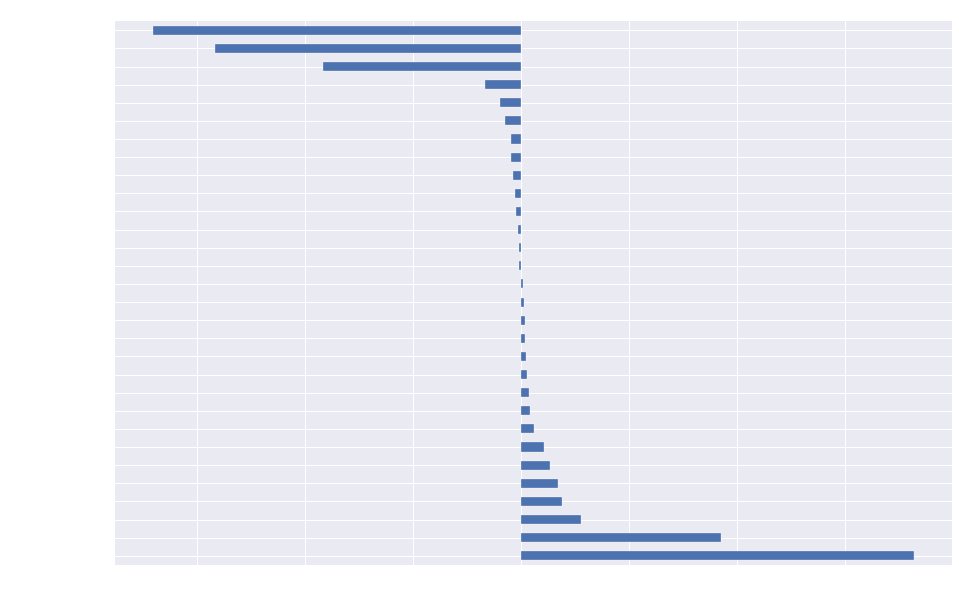

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
model_coef.loc[model_coef['Values'] !=0].plot.barh(x='Features', y= 'Values', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_title('Lasso Pitcher Coefficients')

ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/lasso_pitcher_coef.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

In [ ]:
GBest_pitch = ensemble.GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=3,max_features='sqrt',
                                        min_samples_leaf=15,min_samples_split=10,loss='huber')

In [101]:
GBest.fit(X_train_pitch, y_train_pitch)
y_train_pred_gb =  GBest.predict(X_train_pitch)
y_pred_gb = GBest.predict(X_test_pitch)


train_r2 = r2_score(y_train_pitch, y_train_pred_gb)
test_r2 = r2_score(y_test_pitch, y_pred_gb)
print('Train R^2: ' + str(train_r2))
print('Test R^2: ' + str(test_r2))

Train R^2: 0.9836511229184267
Test R^2: 0.2441326972465292


In [97]:
lassoCV_model = LassoCV(cv=5, random_state=42, n_jobs = -1)
lassoCV_model.fit(X_train_pitch, y_train_pitch)
trainr2 = lassoCV_model.score(X_train_pitch, y_train_pitch)
testr2 = lassoCV_model.score(X_test_pitch, y_test_pitch)

lassoCV_pred = lassoCV_model.predict(X_test_pitch)
print('R2 of Train LassoCV: ', trainr2)
print('R2 of Test LassoCV: ', testr2)

R2 of Train LassoCV:  0.40394988226579387
R2 of Test LassoCV:  0.3321588829238984
